In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('../datasets/yummly/recipes_from_api_new.csv')
df.head()

,id,link,name,totalTime,rating,category,cuisine,tags,IngredientsWithAmount,Ingredients,NutritionValues
0,2574596,https://www.yummly.com/recipe/The-Best-Asian-V...,The Best Asian Vegetables,35 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Easy...","['two Tablespoons vegetable oil', '2 medium zu...","['vegetable oil', 'medium zucchini', 'broccoli...","{'FAT_KCAL': '90.0kcal', 'K': '0.57g', 'FASAT'..."
1,1110225,https://www.yummly.com/recipe/Best-Asian-Meatb...,Best Asian Meatball,1 hr,4.0,Main Dishes,Chinese,"[{'course': ['Main Dishes']}, {'cuisine': ['Ch...","['1lb lean ground beef', '½ cup white onion (m...","['lean ground beef', 'white onion', 'egg', 'ga...","{'FAT_KCAL': '70.0kcal', 'K': '0.69g', 'FASAT'..."
2,9374100,https://www.yummly.com/recipe/The-Best-Asian-P...,The Best Asian Peanut Sauce,10 min,4.0,Condiments and Sauces,Asian,"[{'course': ['Condiments and Sauces']}, {'cuis...","['2 tablespoons light coconut milk', '1/4 cup ...","['light coconut milk', 'low sodium chicken bro...","{'FAT_KCAL': '120.0kcal', 'K': '0.23g', 'FASAT..."
3,2385453,https://www.yummly.com/recipe/Best-Asian-Garli...,Best Asian Garlic Paleo Whole30 Noodles,10 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Quic...",['1 large cooked spaghetti squash see notes on...,"['spaghetti squash', 'medium zucchini', 'large...","{'FAT_KCAL': '100.0kcal', 'K': '0.75g', 'FASAT..."
4,9599331,https://www.yummly.com/recipe/The-Best-Asian-S...,The Best Asian Style Green Beans,15 min,4.0,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...",['2 lbs frozen or fresh whole green beans (If ...,"['green beans', 'olive oil', 'soy sauce', 'gra...","{'FAT_KCAL': '25.0kcal', 'K': '0.24g', 'FASAT'..."


In [36]:
df.shape

(346252, 11)

In [37]:
df[df['tags'].map(len) == 0].size

0

In [41]:
df.drop_duplicates(inplace=True)
df.shape

(167158, 11)

In [42]:
df.cuisine.value_counts()

Asian                   6705
Italian                 4905
Mexican                 4707
Indian                  3748
Thai                    3709
Greek                   3673
Korean                  3289
Chinese                 2562
Japanese                2485
Vietnamese              2201
French                  1978
Mediterranean           1940
Southern & Soul Food    1857
Spanish                 1657
Moroccan                1420
Irish                   1412
Barbecue                1381
German                  1116
Filipino                1067
Cuban                    978
Jamaican                 950
Brazilian                917
American                 666
Cajun & Creole           628
Hungarian                501
Hawaiian                 422
Kid-Friendly             407
Southwestern             352
Portuguese               207
Swedish                  154
Ethiopian                123
English                  123
Turkish                   89
Russian                   76
Jewish        

<AxesSubplot: >

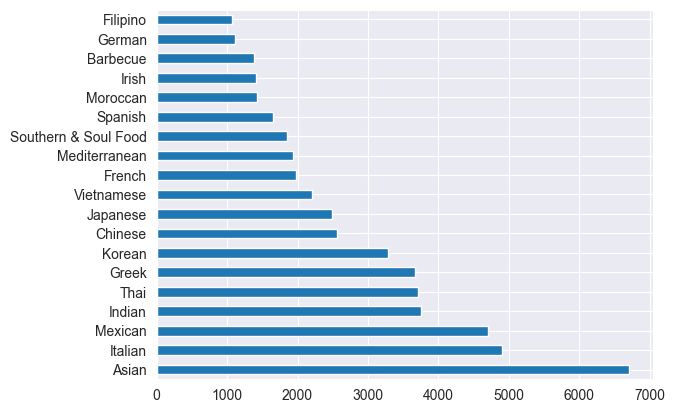

In [43]:
cuisine_names = df.cuisine.value_counts()
cuisine_names = cuisine_names[cuisine_names > 1000]
cuisine_names.plot(kind='barh')

In [44]:
df.insert(0, "id", [link[link.rfind('-')+1:] for link in df.link], True)
df.set_index('id', inplace=True)
df.head()

,link,name,totalTime,rating,category,cuisine,tags,IngredientsWithAmount,Ingredients,NutritionValues
id,,,,,,,,,,
"(2574596, 2574596)",https://www.yummly.com/recipe/The-Best-Asian-V...,The Best Asian Vegetables,35 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Easy...","['two Tablespoons vegetable oil', '2 medium zu...","['vegetable oil', 'medium zucchini', 'broccoli...","{'FAT_KCAL': '90.0kcal', 'K': '0.57g', 'FASAT'..."
"(1110225, 1110225)",https://www.yummly.com/recipe/Best-Asian-Meatb...,Best Asian Meatball,1 hr,4.0,Main Dishes,Chinese,"[{'course': ['Main Dishes']}, {'cuisine': ['Ch...","['1lb lean ground beef', '½ cup white onion (m...","['lean ground beef', 'white onion', 'egg', 'ga...","{'FAT_KCAL': '70.0kcal', 'K': '0.69g', 'FASAT'..."
"(9374100, 9374100)",https://www.yummly.com/recipe/The-Best-Asian-P...,The Best Asian Peanut Sauce,10 min,4.0,Condiments and Sauces,Asian,"[{'course': ['Condiments and Sauces']}, {'cuis...","['2 tablespoons light coconut milk', '1/4 cup ...","['light coconut milk', 'low sodium chicken bro...","{'FAT_KCAL': '120.0kcal', 'K': '0.23g', 'FASAT..."
"(2385453, 2385453)",https://www.yummly.com/recipe/Best-Asian-Garli...,Best Asian Garlic Paleo Whole30 Noodles,10 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Quic...",['1 large cooked spaghetti squash see notes on...,"['spaghetti squash', 'medium zucchini', 'large...","{'FAT_KCAL': '100.0kcal', 'K': '0.75g', 'FASAT..."
"(9599331, 9599331)",https://www.yummly.com/recipe/The-Best-Asian-S...,The Best Asian Style Green Beans,15 min,4.0,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...",['2 lbs frozen or fresh whole green beans (If ...,"['green beans', 'olive oil', 'soy sauce', 'gra...","{'FAT_KCAL': '25.0kcal', 'K': '0.24g', 'FASAT'..."


In [45]:
from sklearn.model_selection import train_test_split

y = df.cuisine
X = df[['Ingredients', 'rating']]
X_notnull = X[y.notnull()]
X_null = X[y.isnull()]
y_notnull = y[y.notnull()]
y_null = y[y.isnull()]
X_train, X_test, y_train, y_test = train_test_split(X_notnull,y_notnull,random_state=12345,shuffle=True)

print(y.size, y_notnull.size+y_null.size,y_notnull.size, y_null.size)

167158 167158 58428 108730


In [ ]:
# TODO: Vectorize inputs -> Find tf/idf scores -> create model -> train model -> get results

In [ ]:
def generate_text(data):
    return [" ".join(x['Ingredients']).lower() for x in data]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
